In [47]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
#from xgboost import XGBRegressor
from sklearn import metrics         

In [7]:
df = pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
df.shape

(301, 9)

In [12]:
df.size

2709

In [14]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [19]:
# checking the distribution of value count

In [29]:
print(df.Car_Name.value_counts())
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [25]:
df.Fuel_Type

0      Petrol
1      Diesel
2      Petrol
3      Petrol
4      Diesel
        ...  
296    Diesel
297    Petrol
298    Petrol
299    Diesel
300    Petrol
Name: Fuel_Type, Length: 301, dtype: object

In [32]:
#encoding "fuel_type" columns
df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

#encoding "Seller_type" columns
df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)


#encoding "Transmission" columns
df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)



In [34]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [37]:
#  spliting Testing and traning data
x = df.drop(["Car_Name","Selling_Price"],axis=1)
y = df["Selling_Price"]

In [39]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [41]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [60]:
# model Training
# 1.Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
lin_reg = LinearRegression()

# Now you can use lin_reg for linear regression operations

In [62]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [63]:
# model Evaluation
# prediction on traning data
train_pred = lin_reg.predict(x_train)

In [55]:
# r Square error

In [65]:
error_square  = metrics.r2_score(y_train,train_pred)
print("R2 Error",error_square)

R2 Error 0.8799451660493701


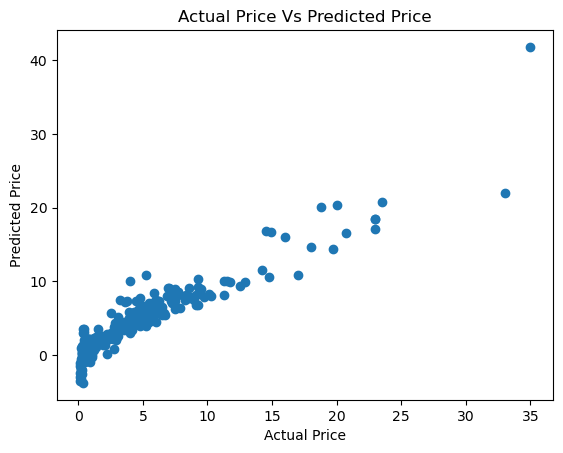

In [67]:
# Vasualize the predicted and actual price
plt.scatter(y_train,train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

In [70]:
# prediction on test data
test_pred = lin_reg.predict(x_test)
error_square  = metrics.r2_score(y_test,test_pred)
print("R2 Error",error_square)

R2 Error 0.836576671502687


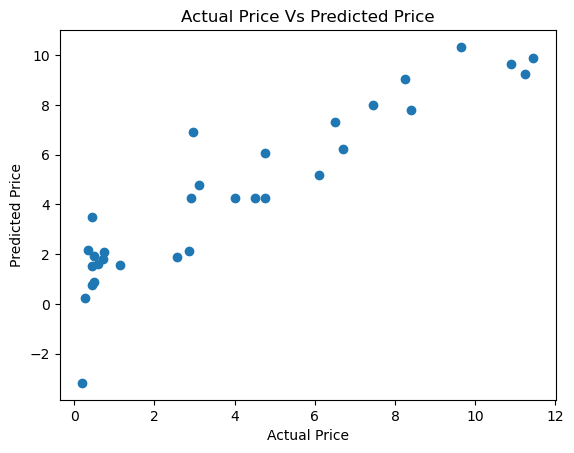

In [72]:
# Vasualize the predicted and actual price
plt.scatter(y_test,test_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

In [ ]:
# model Evaluation
# Method 2 laSSO reg
# prediction on traning data


In [75]:
from sklearn.linear_model import Lasso

# Create an instance of Lasso
lasso_reg = Lasso()

# Now you can use lasso_reg for Lasso regression operations


In [76]:
lasso_reg.fit(x_train,y_train)

Lasso()

In [77]:
# model Evaluation
# prediction on traning data
train_pred = lasso_reg.predict(x_train)

In [55]:
# r Square error

In [78]:
error_square  = metrics.r2_score(y_train,train_pred)
print("R2 Error",error_square)

R2 Error 0.8427856123435794


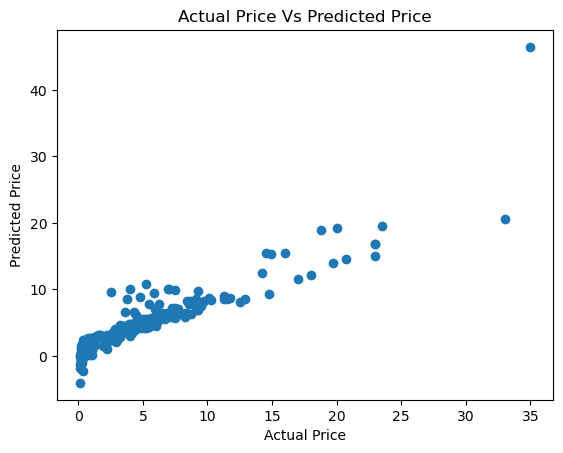

In [79]:
# Vasualize the predicted and actual price
plt.scatter(y_train,train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

In [80]:
# prediction on test data
test_pred = lasso_reg.predict(x_test)
error_square  = metrics.r2_score(y_test,test_pred)
print("R2 Error",error_square)

R2 Error 0.8709167941173195


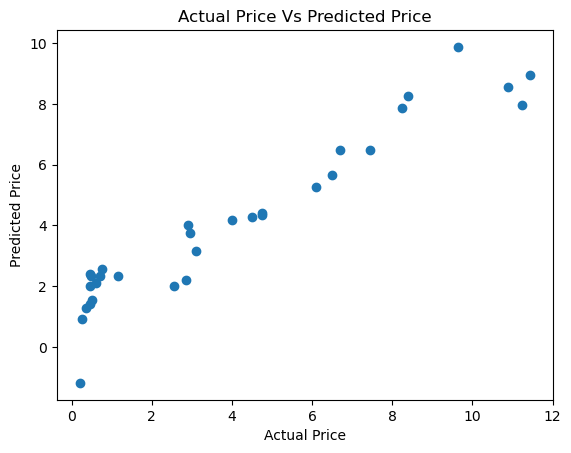

In [81]:
# Vasualize the predicted and actual price
plt.scatter(y_test,test_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()